<a href="https://colab.research.google.com/github/cozyrim/Summer-Field-Practice/blob/master/%ED%95%84%EA%B8%B0%EC%B2%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


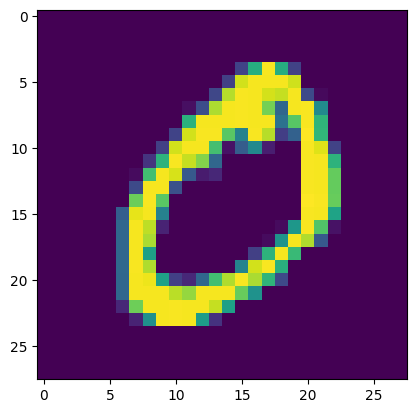

X_train_shape: (60000, 784)
X_test_shape: (10000, 784)
y_train_shape: (60000, 10)
y_test_shape: (10000, 10)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2826 - acc: 0.9194 - val_loss: 0.1622 - val_acc: 0.9551
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1254 - acc: 0.9631 - val_loss: 0.1178 - val_acc: 0.9643
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - l

In [ ]:
import matplotlib.pyplot as plt  # 그림으로 보기 위한 matplotlib 라이브러리 import
import tensorflow
from tensorflow.keras.datasets import mnist  # 라이브러리가 기본으로 제공하는 mnist 데이터셋
from tensorflow.keras.utils import to_categorical  # one-hot encoding 을 위한 함수
from tensorflow.keras.models import Sequential  # 레이어를 층층히 쌓아가는 연쇄 모델
from tensorflow.keras.layers import Dense  # 완전연결층
from tensorflow.keras.models import load_model  # 저장된 모델 불러오기

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train 입력 데이터, y_train 정답 데이터
# 데이터셋 차원 확인
print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 28, 28)
print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000,)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 28, 28)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000,)

# 데이터 전처리
plt.imshow(X_train[1])
plt.show()
input_shape = X_train.shape[1] * X_train.shape[2]  # 그림의 크기: 28 * 28
number_of_classes = len(set(y_train))  # 레이블의 종류. 0~9로 10개

X_train = X_train / 255.0
X_test = X_test / 255
X_train = X_train.reshape(-1, input_shape)  # 3차원 -> 2차원
X_test = X_test.reshape(-1, input_shape)

print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 784)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 784)

y_train = to_categorical(y_train, number_of_classes)  # 원-핫 인코딩. 1차원 -> 2차원
y_test = to_categorical(y_test, number_of_classes)

print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000, 10)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000, 10)


model = Sequential()  # 모델 선언

# 완전연결층 추가. 처음 쌓는 레이어는 input_shape: 데이터 차원(개수 제외)을 적어줘야함.
model.add(Dense(128, activation="relu", input_shape=X_train.shape[1:]))

# 출력하는 완전연결층 추가. 다중분류이므로, softmax 활성화함수 사용
model.add(Dense(y_train.shape[1], activation="softmax"))

# 모델 컴파일. 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

model.summary()  # 간단하게 요약해 출력

history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.2)
loss, acc = model.evaluate(X_test, y_test)  # 학습 완료 후 검증
print("손실률:", loss)  # 손실률:
print("정확도:", acc)  # 정확도:


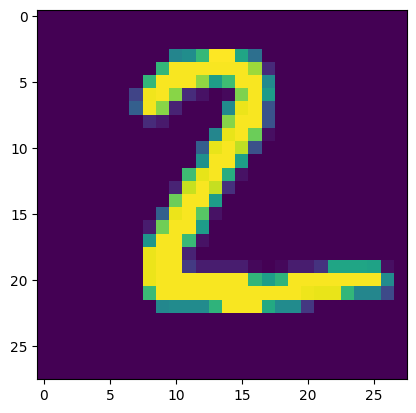

1/1 [==============================] - 0s 29ms/step
real: 2
predict: 2


In [ ]:
model.save("저장할 모델의 위치.h5")
loaded_model = load_model("저장할 모델의 위치.h5")

plt.imshow(X_test[1].reshape(28, 28))  # 데이터 일자로 펴주기
plt.show()

y_prob = model.predict(X_test[:2])[1]  # 다중분류이므로, predict_classes
predicted = y_prob.argmax(axis=-1)

print("real:", y_test[1].argmax())
print("predict:", predicted)